<a href="https://colab.research.google.com/github/3000August/HDSC-22/blob/main/Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pystan~=2.14
!pip install fbprophet


In [192]:
#importing the dataset

df = pd.read_csv(r'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [193]:
#setting the FullDate column to DateTimeIndex
dff = df.set_index(pd.to_datetime(df['FullDate']))

In [194]:
#Resampling the data to daily sampling rate
daily = dff.resample('D').sum()

QUESTION 11

Text(0, 0.5, 'ElecPrice')

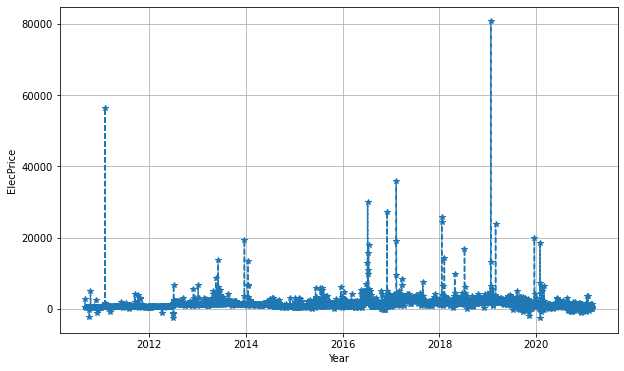

In [195]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(daily.index, daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

QUESTION 12

In [196]:
#evaluating p-value for SysLoad of resampled dataset
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily[ 'SysLoad' ])

print( f'p-value: {adf_result[ 1 ]}')


p-value: 0.004253725504574117


In [197]:
#evaluating p-value for GasPrice of resample data set
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily[ 'GasPrice' ])

print( f'p-value: {adf_result[ 1 ]}')


p-value: 0.04502721288462542


QUESTION 13

In [198]:
#evaluating critical values for GasPrice of resampled data set
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'GasPrice' ])


In [199]:
print('Critical Values:')
for f, x in adf_result[ 4 ].items():
 print(f'{f} : {x}') 

Critical Values:
1% : -3.430421106837576
5% : -2.86157142807793
10% : -2.566786728071412


In [200]:
#evaluating critical values for ElecPrice of resampled data set
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'ElecPrice' ])


In [201]:
print('Critical Values:')
for f, x in adf_result[ 4 ].items():
 print(f'{f} : {x}') 

Critical Values:
1% : -3.430421110703783
5% : -2.8615714297867108
10% : -2.56678672898094


QUESTION 14

In [202]:
#selecting the train set and test set
train_df = daily.iloc[:2757]
test_df = daily.iloc[2757:]
print(len(train_df))
print(len(test_df))

2757
1077


In [203]:
#importing the model to be used
from fbprophet import Prophet


#renaming the train and test sets with the appriopriate column names
train = train_df.reset_index()
trainn = train.rename( columns={'FullDate' : 'ds', 'ElecPrice': 'y'})



test = test_df.reset_index()
testt = test.rename( columns={'FullDate' : 'ds', 'ElecPrice': 'y'})



In [204]:
train_set = trainn[['ds', 'y']]
test_set = testt[['ds', 'y']]

In [205]:
#instantiating and fitting the model
model = Prophet()
model.fit(train_set)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [206]:
#predicting the test set
forecast = model.predict(test_set) 
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,170.849094,5017.814015,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,198.788918,4948.860756,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,368.214628,5000.820998,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,267.529381,4684.123587,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,76.415671,4700.128969,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [207]:
#defining a function to calculate the Mean Average Percentage Error

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

In [208]:
#evaluating the Mean Average Percentage Error using the function
print('Mean Average Percentage Error:') 
print(mape(test_set['y'], forecast['yhat']))

Mean Average Percentage Error:
549.4751413716547


QUESTION 15

In [209]:
#evaluating the ROot Mean Squared Error
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(forecast['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,1)))

The Root Mean Square Error(rmse) value is : 3218.2


QUESTION 16

Figure(648x648)
July has the highest value of yearly seasonality


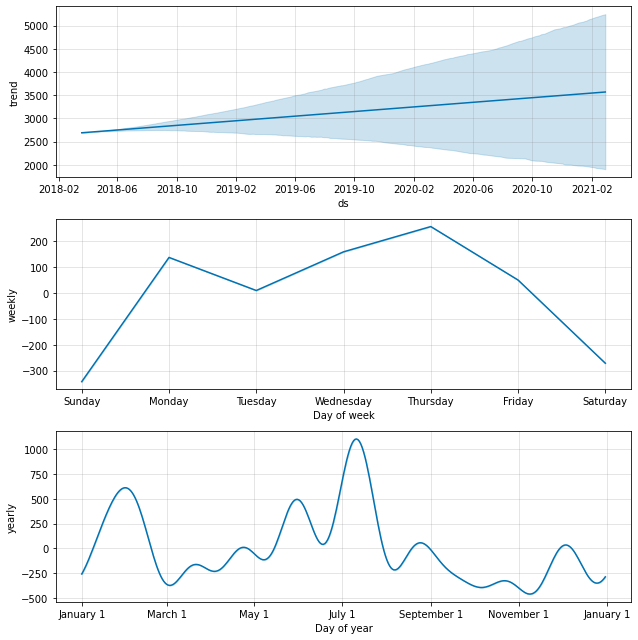

In [210]:
#plotting components
print(model.plot_components(forecast))

print("July has the highest value of yearly seasonality")

QUESTION 17

In [211]:
#renaming the columns to appriopriate column names
daily2 = daily.reset_index().rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1',
                                                'Tmax':'add2','GasPrice':'add3'})

#splitting into train and test sets
train_df2 = daily2.iloc[:2757]
test_df2 = daily2.iloc[2757:]


#instantiating the model for multvariate forecasting using the regressors
#fitting the model and predicting the test set

m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')
m.fit(train_df2)

a = m.predict(test_df2)
a.shape

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(1077, 31)

In [212]:
#evaluating MAPE

print('Mean Average Percentage Error:') 
print(mape(test_df2['y'], a['yhat']))

Mean Average Percentage Error:
231.28067149407525


QUESTION 18

In [213]:
#evaluating RMSE

rmse = np.sqrt(metrics.mean_squared_error(np.array(test_df2['y']),np.array(a['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,1)))

The Root Mean Square Error(rmse) value is : 2706.9


QUESTION 19

Figure(648x864)
Thursday has the highest value of daily seasonality


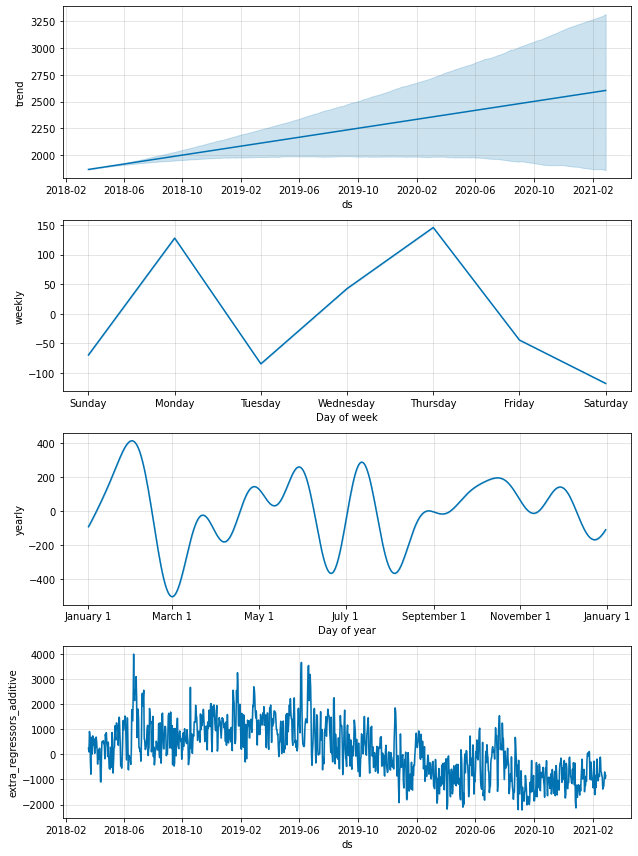

In [214]:
print(m.plot_components(a))

print('Thursday has the highest value of daily seasonality')

QUESTION 20

In [215]:
#dropping the "Tmax" column from the train data which was renamed as "add2"

train_df3 = train_df2.drop('add2', axis=1)
test_df3 = test_df2.drop('add2', axis=1)

#fitting the model with the new train data and predicting with the test data
m2 = Prophet()
m2.add_regressor('add1')
m2.add_regressor('add3')
m2.fit(train_df3)
a2 = m2.predict(test_df2)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [216]:
#evaluating MAPE

print('Mean Average Percentage Error:') 
print(mape(test_df2['y'], a2['yhat']))


Mean Average Percentage Error:
233.7211726531121
